In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:/datasets+minipro/Analytics vidhya free course material/Regression/bigmartanalytics.csv')

In [3]:
# dftr=pd.read_csv('D:/datasets+minipro/Analytics vidhya free course material/Regression/bigmartanalytics.csv')
# dfte=pd.read_csv('D:/datasets+minipro/analytics vidhya datasets/bigmart sale/test_AbJTz2l.csv')
# dfte['Item_Outlet_Sales']=np.nan

# dftr['type']='train'
# dfte['type']='test'

# df=pd.concat([dftr.reset_index(drop=True),dfte.reset_index(drop=True)],0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.head()
# initial observation :
# Item_identifier,Outlet_Identifier is not useful,can be dropped.[2 Features]
# Item_weight continuous numeric variable
# Item_Fat_Content,Item_Type are categorical feature can be treated by label encoding/manual label encoding[box plot]/get_dummies
# Outlet_identifier can be converted by label encoder as there can be no order/manual LE/get_dummies
# Outlet_Size can be converted by LE[preferred as order is present]/manual LE/get_dummies
# Outlet_Location_Type can be converted by manual LE[order is present]
# Item_Outlet_sales target variable.
# No order Outlet_Type/get_dummies preffered.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
# Lets begin by saying that we should drop the variables Item_Identifier &  Outlet_Identifier
# But,we keep Outlet_Identifier for now to build our base model using statsmodel and testing reponse with target variable
# So,we convert it. 

In [9]:
df.drop('Item_Identifier',1,inplace=True)

# Performing basic EDA:[With Outlet_identifier]

In [10]:
df1=df.copy() # make any change in df1

In [11]:
# we convert Item_Fat_Content with Label encoding as there is no order assigned to it.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

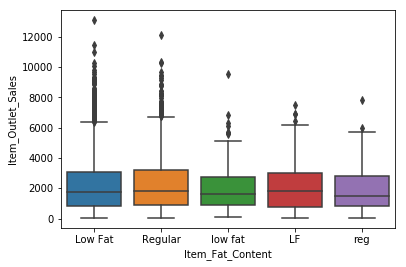

In [12]:
sns.boxplot(df1['Item_Fat_Content'],df1['Item_Outlet_Sales'])
plt.show()
# we tried to find out if there is any order to it by plotting it wrto target.
# Unfortunately there is not,so have to go with Label encoder/Dummification
# The problem with label encoding is that some order will be assigned to it by alphabets.
# So,we will only go with dummies.
# 1 thing I have observed here is LF,,low fat also means Low fat and reg means regular,there is no need to keep them 
# in separate class,so we will merge them

In [13]:
### Converting Incorrect classes,typos into same class in df1.
df1['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

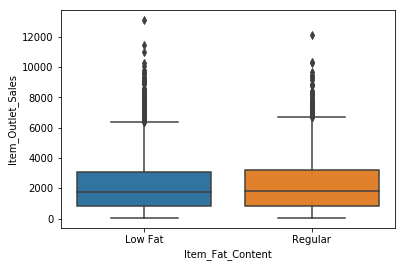

In [14]:
# Lets check the boxplot again wrto target

sns.boxplot(df1['Item_Fat_Content'],df1['Item_Outlet_Sales'])
# still no difference,so we can go with label or get_dummies[either or]as only 2 classes are present.

In [15]:
# I will choose to do get_dummies.

a=pd.get_dummies(df1['Item_Fat_Content'],drop_first=True)# we will concat it to df1 later

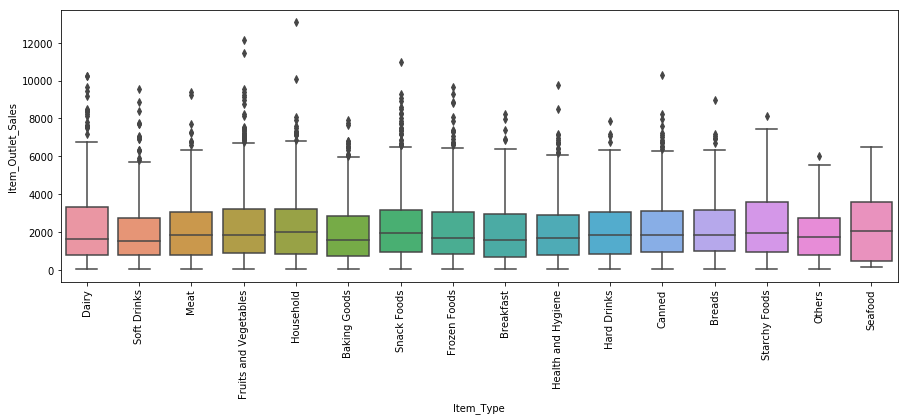

In [16]:
# Item_Type
fig,axes=plt.subplots(figsize=(15,5))
sns.boxplot(df1['Item_Type'],df1['Item_Outlet_Sales'])
plt.xticks(rotation=90)
plt.show()
# In this case also,we can not find order for manual LE,so we will go with LE/get_dummies
# As no order can be assigned to it such as rating/degree
# we have to fwd with get_dummies

In [17]:
b=pd.get_dummies(df1['Item_Type'],drop_first=True) # use it later for concat

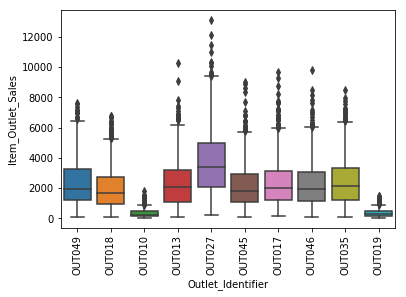

In [18]:
sns.boxplot(df1['Outlet_Identifier'],df1['Item_Outlet_Sales'])
plt.xticks(rotation=90)
plt.show()
# Its messy,I would rather prefer get_dummies just to check the response

In [19]:
c=pd.get_dummies(df1['Outlet_Identifier'],drop_first=True) # use later.concat

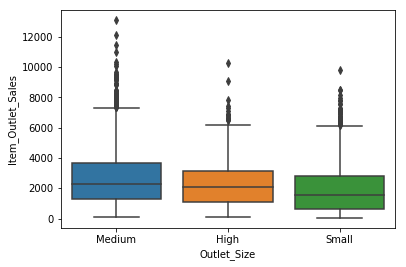

In [20]:
sns.boxplot(df1['Outlet_Size'],df1['Item_Outlet_Sales'])
# here we see clear order between target and input feature,so we can manually label encode by looking 

In [21]:
df.isnull().sum()
# As we can observe there are some null values in the Outlet_size,
# we can impute it by replacing all null values with mode as it is caegorical feature

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
df1.groupby(df1['Outlet_Size']).agg('mean')['Item_Outlet_Sales']
# Just to take a look at how size matters in terms of outlet sales,this confirms that we can impute null values 
# as medium 

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [23]:
df1['Outlet_Size'].mode()

0    Medium
dtype: object

In [24]:
df1['Outlet_Size'].fillna('Medium',inplace=True)
# After this there are no null values in the whole dataset.

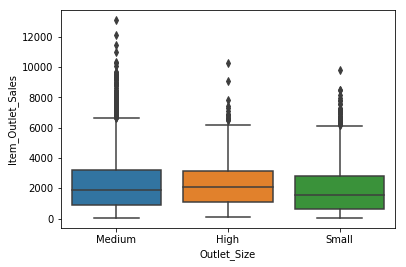

In [25]:
sns.boxplot(df1['Outlet_Size'],df1['Item_Outlet_Sales'])
# The impact made by imputing null values is that,our boxplot now is showing that 'High' should be assigned higher order

In [26]:
# Manual label encoding
df1['Outlet_Size'].replace({'Small':1,'Medium':2,'High':3},inplace=True)

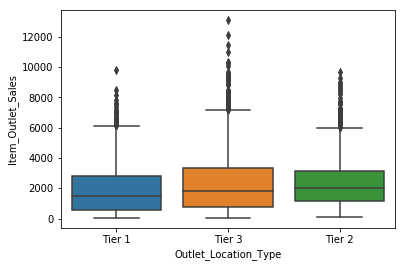

In [27]:
# Outlet_Location_Type
sns.boxplot(df1['Outlet_Location_Type'],df1['Item_Outlet_Sales'])

In [28]:
# Manual label encoding:[Important note this,we are doing in this order because of boxplot]
df1['Outlet_Location_Type'].replace({'Tier 1':1,'Tier 3':2,'Tier 2':3},inplace=True)

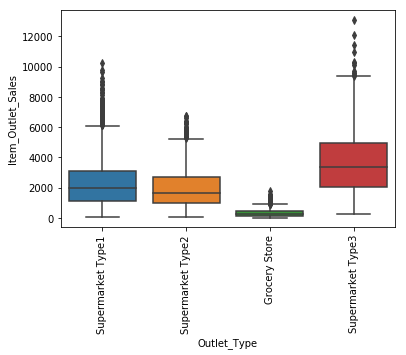

In [29]:
# again,manual LE is applicable,clear distinction is visible,so no need to do LE/get_dummies and increase the features
sns.boxplot(df1['Outlet_Type'],df1['Item_Outlet_Sales'])
plt.xticks(rotation=90)
plt.show()

In [30]:
df1.groupby(df1['Outlet_Type'])['Item_Outlet_Sales'].mean()
# Sales made by supermarket 3 are way better as compared to other stores.!

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [31]:
# Manual LE:
df1['Outlet_Type'].replace({'Grocery Store':1,'Supermarket Type2':2,'Supermarket Type1':3,'Supermarket Type3':4},inplace=True)

In [32]:
df1['Outlet_Type'].value_counts()
# One thing we can note that,even though the number of supermarket type 3 are less,we can observe that sales made by 
# type 3 are more as compared to any other stores!

3    5577
1    1083
4     935
2     928
Name: Outlet_Type, dtype: int64

In [33]:
# Impute null values in Item_weight feature!

In [34]:
# Now,we can impute the null values in item_weight by 2 ways.
# 1st way is to simply impute them by imputing with mean
# 2nd way is to impute by keeping 1 parameter common by using groupby

In [35]:
df1.groupby(df1['Item_Type'])['Item_Weight'].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [36]:
## Imputing missing values in item_weight base on item type
# df1['Item_Weight']=df1.groupby('Item_Type').Item_Weight.apply(lambda x: x.fillna(x.mean()))
df1['Item_Weight']=df1['Item_Weight'].fillna(df1['Item_Weight'].mean())

In [37]:
df1['Item_Weight'].isnull().sum()
# Cool!,so null values are there now.

0

In [38]:
df1['Outlet_Establishment_Year'].unique()
# here ,we can do 1 more thing,as order for year is fixed,we can manually convert them 

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

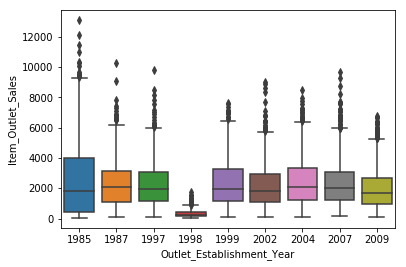

In [39]:
sns.boxplot(df1['Outlet_Establishment_Year'],df1['Item_Outlet_Sales'])
# This is too messy!we can go for replacement,as we dont need high values

In [40]:
x=list(set(df1['Outlet_Establishment_Year'].unique().tolist()))

In [41]:
# conversion from year to scale of 1 to 10
# df1['Outlet_Establishment_Year']=df1['Outlet_Establishment_Year'].replace({i:(x.index(i))+1 for i in x})

In [42]:
# concatenating:
df2=pd.concat([df1,a,b,c],1)

In [43]:
df2.drop(['Item_Fat_Content','Item_Type','Outlet_Identifier'],1,inplace=True)

In [44]:
# df2 is our final dataframe in which we will apply all the models

In [45]:
df2.head(1)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Regular,Breads,...,Starchy Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,9.3,0.016047,249.8092,1999,2,1,3,3735.138,0,0,...,0,0,0,0,0,0,0,0,0,1


# Importing all the models:

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Testing the assumption for Linear regression

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X=df2.drop('Item_Outlet_Sales',1)
y=df2['Item_Outlet_Sales']

In [49]:
# Lets build base model first:[OLS using stats]
import statsmodels.api as sm
X=df2.drop('Item_Outlet_Sales',1)
y=df2['Item_Outlet_Sales']
Xc=sm.add_constant(X)
model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     392.0
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        08:07:44   Log-Likelihood:                -71988.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8494   BIC:                         1.442e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.7891      0.455     -3.931      0.000      -2.681      -0.897
Item_Weight                  -0.5076      2.915     -0.174      0.862      -6.221       5.206
Item_Visibility            -304.4402    248.715     -1.224      0.221    -791.983     183.102
Item_MRP                     15.5652      0.198     78.739      0.000      15.178      15.953
Outlet_Establishment_Year    -1.4073      0.046    -30.695      0.000      -1.497      -1.317
Outlet_Size                  -7.6910     18.753     -0.410      0.682     -44.452      29.070
Outlet_Location_Type          1.3971     14.555      0.096      0.924     -27.134      29.928
Outlet_Type                1004.1119     23.000     43.658      0.000     959.027    1049.197
Regular                      40.6338     28.229      1.439      0.150     -14.703      95.970
Breads                        5.1382     84.044      0.061      0.951    -159.608     169.885
Breakfast                     7.5359    116.602      0.065      0.948    -221.033     236.105
Canned                       25.5284     62.766      0.407      0.684     -97.508     148.565
Dairy                       -40.7147     62.226     -0.654      0.513    -162.693      81.264
Frozen Foods                -28.0245     58.866     -0.476      0.634    -143.415      87.366
Fruits and Vegetables        29.8086     54.957      0.542      0.588     -77.920     137.538
Hard Drinks                  -0.3178     90.185     -0.004      0.997    -177.102     176.467
Health and Hygiene          -10.6230     68.010     -0.156      0.876    -143.938     122.693
Household                   -39.2674     59.920     -0.655      0.512    -156.725      78.190
Meat                         -0.4540     70.647     -0.006      0.995    -138.939     138.031
Others                      -21.5785     98.616     -0.219      0.827    -214.889     171.732
Seafood                     184.8704    148.004      1.249      0.212    -105.253     474.994
Snack Foods                 -11.4059     55.247     -0.206      0.836    -119.704      96.892
Soft Drinks                 -27.7527     70.168     -0.396      0.692    -165.299     109.794
Starchy Foods                21.4338    103.035      0.208      0.835    -180.540     223.407
OUT013                      -79.0246     31.218     -2.531      0.011    -140.220     -17.829
OUT017                       13.3770     33.840      0.395      0.693     -52.957      79.711
OUT018                      639.8976     45.467     14.074      0.000     550.771     729.024
OUT019                       -6.5099     50.572     -0.129      0.898    -105.643      92.623
OUT027                      324.7999     35.921      9.042      0.000     254.385     395.215
OUT035                       41.0897     25.481      1.613      0.107      

#### 1 - Autocorrelation :

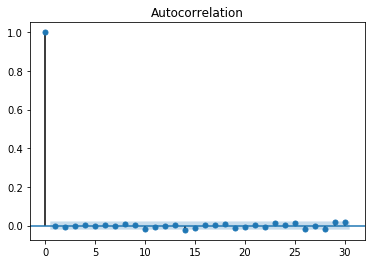

In [50]:

# As we can observe that base model is not giving good accuracy in terms of r2 score.
# we can also see that durbin-watson score is good enough(Approx close to 2)meaning that there is no autocorrelation
# between residuals
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid, lags=30 , alpha=0.05)
acf.show()
# So, we can see that all lines are within blue boundary indicating that there is almost no autocorrelation
# between input variables.
# Also,durbin watson value is closer to 2 meaning that there is no autocorrelation.
# To summarize:
#      0-2 : +ve autocorrelation
#      closer to 2 : Little or No Autocorrelation
#      2-4 : -ve autocorrelation

#### Assumption 2 : Normality of residuals:[using jarque berra test]:

(2312.7794069568918, 0.0)
chisquare stat critical 5.991464547107983


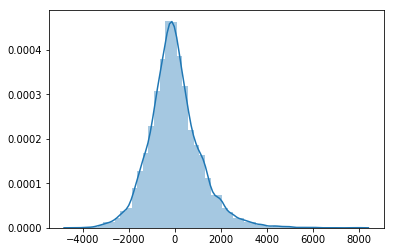

In [51]:
from scipy import stats
print(stats.jarque_bera(model.resid))
print('chisquare stat critical',stats.chi2.isf(0.05,2))
# Framing hypothesis:
# H0- Errors/residual are normally distributed
# HA- Errors/residuals are not normally distributed
## from output of p value as p-val < alpha, we reject null hypothesis and accept alternate hypothesis.
# we can say that errors are not normally distributed with statistical certainty.
# Also, from JB statistic,we can see that it is much higher than 6,so it definitely lies in critical region,So,
# Reject null hypothesis there as well.
sns.distplot(model.resid)

#### Assumption 3: Linearity of residuals:

(1.0833526818749006, 0.004552889527116039)


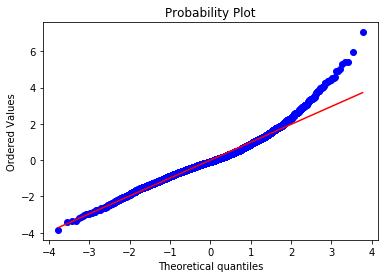

In [52]:

import statsmodels.api as sm
print(sm.stats.diagnostic.linear_rainbow(res=model, frac=0.5))
# H0 -errors are linear 
# HA- errors are not linear
# So, p value < alpha ,we reject null hypothesis,i.e- errors/residual are not normal.
from statsmodels.graphics.gofplots import ProbPlot
import pylab
st_residual = model.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

# Also,the graph shows plot is not following linearity.
# As, p value is less than alpha,we reject null hypothesis.So,we can say with statistical certainty that
# errors are not linear which means that linear models will not work efficiently.

#### Assumption 4 : homoscedastic

In [53]:
# H0- Data is homoscedastic [ constant variance across the data] 
# HA- Data is heteroscedastic [No constant variance across the data] 
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)
# Since,P value > alpha ,we fail to reject null hypothesis.
# here,we can say that data is homoscedastic.

[('F statistic', 0.9946173840447672), ('p-value', 0.569676818694325)]


#### Assumption 5- Multicollinearity:

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

## So,Multicollinearity does not exist.
## All the values of vif are below 5.So there is no multicollinearity

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Regular,Breads,Breakfast,...,Starchy Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
vif,1.014446,1.101152,1.01331,inf,inf,inf,inf,1.216577,1.350023,1.158253,...,1.211323,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [55]:
# Trying with Linear regression:
X=df2.drop('Item_Outlet_Sales',1)
y=df2['Item_Outlet_Sales']
Xc=sm.add_constant(X)

#Splitting X&y using train_test:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=8)

## only linear regression:

linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_tr_pred=linreg.predict(X_train)
y_test_pred=linreg.predict(X_test)

# training data & testing data accuracy:
print('r2_score on training data: ',r2_score(y_train,y_tr_pred)) #train
print('r2_score on testing data: ',r2_score(y_test,y_test_pred)) #test

# RMSE for train & test:
print('RMSE on training data: ',np.sqrt(mean_squared_error(y_train,y_tr_pred)))  #train
print('RMSE on testing data: ',np.sqrt(mean_squared_error(y_test,y_test_pred))) #test

# The model seems to be underfit for linear regression.Its not giving very good results

r2_score on training data:  0.5636260325026186
r2_score on testing data:  0.5621157222193849
RMSE on training data:  1115.0392564656654
RMSE on testing data:  1176.4361604517449


In [56]:
#set seed for same results everytime#with Outlet_Identifier
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics


X=df2.drop('Item_Outlet_Sales',1)
y=df2['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =3)

#declare the models
LR=LinearRegression()
KNN = KNeighborsRegressor()
DT =DecisionTreeRegressor()
RF = RandomForestRegressor()


models=[LR,KNN,DT,RF]
sctr,scte,rmse=[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            mse=metrics.mean_squared_error(y_test,y_test_pred)
            mse=np.sqrt(mse)
            sctr.append(train_score)
            scte.append(test_score)
            rmse.append(mse)
    return sctr,scte
ens(X_train,X_test, y_train, y_test)

ensemble=pd.DataFrame({'names':['LR','KNN','DT','RF'],'training':sctr,'testing':scte,'rmse':rmse})
ensemble=ensemble.sort_values(by=['testing','rmse'],ascending=False).reset_index(drop=True)
ensemble

,names,training,testing,rmse
0,LR,0.558578,0.574227,1113.694595
1,RF,0.937283,0.569448,1119.927639
2,KNN,0.649122,0.493717,1214.433386
3,DT,1.000000,0.220728,1506.681691


In [57]:
df2.iloc[:,:-9].head(1)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Regular,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.3,0.016047,249.8092,1999,2,1,3,3735.138,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,15), 'min_samples_leaf':np.arange(2,15)}
rscv_dt =RandomizedSearchCV(dt, dt_params, cv=3, scoring='neg_mean_squared_error')
rscv_dt.fit(X, y)
print(rscv_dt.best_params_)

{'min_samples_leaf': 14, 'max_depth': 6}


In [59]:
#set seed for same results everytime#without Outlet_Identifier
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics

X=df2.drop('Item_Outlet_Sales',1)
X=X.iloc[:,:-9]
y=df2['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state =0)

#declare the models
LR=LinearRegression()
KNN = KNeighborsRegressor()
DT =DecisionTreeRegressor(**rscv_dt.best_params_)
RF = RandomForestRegressor()


models=[LR,KNN,DT,RF]
sctr,scte,rmse=[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            mse=metrics.mean_squared_error(y_test,y_test_pred)
            mse=np.sqrt(mse)
            sctr.append(train_score)
            scte.append(test_score)
            rmse.append(mse)
    return sctr,scte
ens(X_train,X_test, y_train, y_test)

ensemble=pd.DataFrame({'names':['LR','KNN','DT','RF'],'training':sctr,'testing':scte,'rmse':rmse})
ensemble=ensemble.sort_values(by=['testing','rmse'],ascending=False).reset_index(drop=True)
ensemble

# Performance slightly improved

,names,training,testing,rmse
0,DT,0.615424,0.582429,1105.519369
1,RF,0.936955,0.555722,1140.324162
2,LR,0.546353,0.543273,1156.190519
3,KNN,0.649795,0.454459,1263.614194


# Testing data manipulation:

In [60]:
dfte=pd.read_csv('D:/datasets+minipro/analytics vidhya datasets/bigmart sale/test_AbJTz2l.csv')
dftmp=dfte.copy()

In [61]:
dfte=dfte.drop(['Item_Identifier'],1)

In [62]:
dftcp=dfte.copy()

In [63]:
dftcp['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
x=pd.get_dummies(dftcp['Item_Fat_Content'],drop_first=True)# we will concat it to dftcp later
y=pd.get_dummies(dftcp['Item_Type'],drop_first=True) # use it later for concat
z=pd.get_dummies(dftcp['Outlet_Identifier'],drop_first=True) # use later.concat
dftcp['Outlet_Size'].fillna('Medium',inplace=True)
dftcp['Outlet_Size'].replace({'Small':1,'Medium':2,'High':3},inplace=True)

In [64]:
dftcp['Outlet_Location_Type'].replace({'Tier 1':1,'Tier 3':2,'Tier 2':3},inplace=True)
dftcp['Outlet_Type'].replace({'Grocery Store':1,'Supermarket Type2':2,'Supermarket Type1':3,'Supermarket Type3':4},inplace=True)

In [65]:
# dftcp['Item_Weight']=dftcp.groupby('Item_Type').Item_Weight.apply(lambda x: x.fillna(x.mean()))
dftcp['Item_Weight']=dftcp['Item_Weight'].fillna(dftcp['Item_Weight'].mean())
# dftcp['Outlet_Establishment_Year']=dftcp['Outlet_Establishment_Year'].replace({i:(x.index(i))+1 for i in x})
dftefinal=pd.concat([dftcp,x,y,z],1)
# concatenating:
dftefinal=pd.concat([dftcp,x,y,z],1)
dftefinal.drop(['Item_Fat_Content','Item_Type','Outlet_Identifier'],1,inplace=True)

In [66]:
dftefinal.head(1)

##this is what we want to predict

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Regular,Breads,Breakfast,...,Starchy Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,20.75,0.007565,107.8622,1999,2,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Linear regression:

In [67]:
# Trying with Linear regression:
X=df2.drop('Item_Outlet_Sales',1)
y=df2['Item_Outlet_Sales']

## only linear regression:

linreg=LinearRegression()
linreg.fit(X,y)
y_test_pred_f=linreg.predict(dftefinal)
# The model seems to be underfit for linear regression.Its not giving very good results

In [68]:
finalpred=pd.concat([dftmp[['Item_Identifier','Outlet_Identifier']],pd.DataFrame(y_test_pred_f,columns=['Item_Outlet_Sales'])],1)

In [69]:
# finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/bigmart sale/prediction.csv",index=False)

# Random Forest:

In [70]:
# Trying with Linear regression:
X=df2.drop('Item_Outlet_Sales',1)
y=df2['Item_Outlet_Sales']


## only Random forest regression:
RF=RandomForestRegressor()
RF.fit(X,y)
y_test_pred_rf=RF.predict(dftefinal)
# The model seems to be underfit for linear regression.Its not giving very good results

In [71]:
finalpred=pd.concat([dftmp[['Item_Identifier','Outlet_Identifier']],pd.DataFrame(y_test_pred_rf,columns=['Item_Outlet_Sales'])],1)

In [72]:
# finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/bigmart sale/predictionrf.csv",index=False)

# Regression with DT:[This is giving best results so far!  MSE:1159]

In [73]:
X=df2.drop('Item_Outlet_Sales',1)
y=df2['Item_Outlet_Sales']

In [74]:
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50), 'min_samples_leaf':np.arange(2,30)}
rscv_dt =RandomizedSearchCV(dt, dt_params, cv=3, scoring='neg_mean_squared_error')
rscv_dt.fit(X, y)
print(rscv_dt.best_params_)
#{'min_samples_leaf': 4, 'max_depth': 5} giving the best results
#{'min_samples_leaf': 12, 'max_depth': 7}

{'min_samples_leaf': 17, 'max_depth': 6}


In [75]:
dt = DecisionTreeRegressor(**{'min_samples_leaf':4, 'max_depth': 5})

In [76]:
dt.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [77]:
y_test_pred_dt=dt.predict(dftefinal)
finalpred=pd.concat([dftmp[['Item_Identifier','Outlet_Identifier']],pd.DataFrame(y_test_pred_dt,columns=['Item_Outlet_Sales'])],1)

In [78]:
finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/bigmart sale/predictiondt.csv",index=False)

# adaboost:

In [79]:
dt=DecisionTreeRegressor()
AB_DT = AdaBoostRegressor(base_estimator=dt, random_state=0)
mse_bias= []
mse_var=[]
for n_e in np.arange(5,13):
    AB_DT=AdaBoostRegressor(n_estimators=n_e,random_state=0)
    kfold = KFold(shuffle=True, n_splits=3, random_state=0)
    mse = cross_val_score(AB_DT, X, y, cv=kfold, scoring='neg_mean_squared_error' )
    mse_bias.append(np.mean(np.sqrt(np.abs(mse))))
    mse_var.append(np.var(np.sqrt(np.abs(mse)), ddof=1))
print(np.min(mse_bias))
print(np.argmin(mse_bias))
print(np.min(mse_var))
print(np.argmin(mse_var))

print('Min Bias Error:',np.min(mse_bias),' n_estimator:',np.argmin(mse_bias)+1,' Variance Error:',mse_var[np.argmin(mse_bias)])

dt=DecisionTreeRegressor(**{'min_samples_leaf': 4, 'max_depth': 5})
AB_DT = AdaBoostRegressor(base_estimator=dt,n_estimators=3,random_state=0)

AB_DT.fit(X,y)

y_test_pred_AB_DT=AB_DT.predict(dftefinal)
finalpred=pd.concat([dftmp[['Item_Identifier','Outlet_Identifier']],pd.DataFrame(y_test_pred_AB_DT,columns=['Item_Outlet_Sales'])],1)

finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/bigmart sale/predictionABDT.csv",index=False)

1131.2188082011278
1
7.573811186781425
2
Min Bias Error: 1131.2188082011278  n_estimator: 2  Variance Error: 132.02115288215776


In [80]:
# RF with tuning:

In [81]:
RF = RandomForestRegressor(random_state=0)
rf_params = param_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,100,200]}
rscv_rf =RandomizedSearchCV(RF, rf_params, cv=3, scoring='neg_mean_squared_error')
rscv_rf.fit(X, y)
print(rscv_rf.best_params_)
#{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}

{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}


In [82]:
# Trying with Linear regression:
X=df2.drop('Item_Outlet_Sales',1)
y=df2['Item_Outlet_Sales']

## only Random forest regression:
RF=RandomForestRegressor(**rscv_rf.best_params_)
RF.fit(X,y)
y_test_pred_rf=RF.predict(dftefinal)

# The model seems to be underfit for linear regression.Its not giving very good resultsaa

In [83]:
finalpred=pd.concat([dftmp[['Item_Identifier','Outlet_Identifier']],pd.DataFrame(y_test_pred_rf,columns=['Item_Outlet_Sales'])],1)
finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/bigmart sale/predictionrftuned.csv",index=False)

<!-- # Lasso regression:

# Do not use this or linear regression,its giving negative values
# from sklearn.linear_model import Lasso,Ridge

# lasso=Lasso(alpha=0.1,random_state=0)

# lasso.fit(X,y)

# y_test_pred_lo=lasso.predict(dftefinal)

# finalpred=pd.concat([dftmp[['Item_Identifier','Outlet_Identifier']],pd.DataFrame(y_test_pred_lo,columns=['Item_Outlet_Sales'])],1)
# finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/bigmart sale/predictionlassotuned.csv",index=False)

# Ridge regression:

# Do not use this or linear regression,its giving negative values
# from sklearn.linear_model import Lasso,Ridge

# ridge=Ridge(alpha=0.1,random_state=0)

# ridge.fit(X,y)

# y_test_pred_ro=ridge.predict(dftefinal)

# finalpred=pd.concat([dftmp[['Item_Identifier','Outlet_Identifier']],pd.DataFrame(y_test_pred_ro,columns=['Item_Outlet_Sales'])],1)
# finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/bigmart sale/predictionridgetuned.csv",index=False) -->

In [84]:
# Do not use this or linear regression,its giving negative values
# from sklearn.linear_model import Lasso,Ridge

# lasso=Lasso(alpha=0.1,random_state=0)

# lasso.fit(X,y)

# y_test_pred_lo=lasso.predict(dftefinal)

# finalpred=pd.concat([dftmp[['Item_Identifier','Outlet_Identifier']],pd.DataFrame(y_test_pred_lo,columns=['Item_Outlet_Sales'])],1)
# finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/bigmart sale/predictionlassotuned.csv",index=False)

# Ridge regression:

In [85]:
# Do not use this or linear regression,its giving negative values
# from sklearn.linear_model import Lasso,Ridge

# ridge=Ridge(alpha=0.1,random_state=0)

# ridge.fit(X,y)

# y_test_pred_ro=ridge.predict(dftefinal)

# finalpred=pd.concat([dftmp[['Item_Identifier','Outlet_Identifier']],pd.DataFrame(y_test_pred_ro,columns=['Item_Outlet_Sales'])],1)
# finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/bigmart sale/predictionridgetuned.csv",index=False)